# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.
* Relación entre la edad y la supervivencia
* Relación entre clase de cabina y supervivencia: Esto nos dará una idea de cómo las diferentes clases afectaron las tasas de supervivencia.
* Cálculo del porcentaje de mujeres y hombres que sobrevivieron sin contar niños.
* Análisis de supervivencia general: Un resumen general de la tasa de supervivencia, posiblemente desglosado por diferentes variables (sexo, clase, etc.).
* Limpieza de columnas.


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

### Cargamos dataset

In [147]:
titanic_data = pd.read_csv(r'C:\Users\David\Desktop\upgrade_python\temario_bootcamp\Modulo1\Proyecto-Módulo1\Ejercicio3-Titanic\titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Vemos el nº de valores nulos. Observamos que solo la edad, la cabina y la embarcación contienen valores nulos

In [148]:
null_values = titanic_data.isnull().sum()
print(null_values.sum())
print(null_values)

866
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [149]:
total_rows = titanic_data.shape[0]
cabin_null_values = titanic_data['Cabin'].isnull().sum()
cabin_null_percentage = (cabin_null_values / total_rows) * 100
print(f"{cabin_null_percentage:.2f}%")

77.10%


### Representar el porcentaje de filas con atributos nulos.

In [150]:
null_rows = titanic_data.isnull().any(axis=1)

# Calculamos %
percentaje = (null_rows.sum() / len(titanic_data)) * 100

print(f"Porcentaje de filas con almenos un valor nulo: {percentaje:.2f}%")


Porcentaje de filas con almenos un valor nulo: 79.46%


### Edad mínima y máxima de las personas del barco.

In [151]:
titanic_data[titanic_data['Age']<=1]['Age'].unique()

array([0.83, 1.  , 0.92, 0.75, 0.67, 0.42])

In [152]:
min_age = titanic_data['Age'].min()
max_age = titanic_data['Age'].max()

print(f"La edad mínima es de {min_age}")
print(f"La edad máxima es de {max_age}")

La edad mínima es de 0.42
La edad máxima es de 80.0


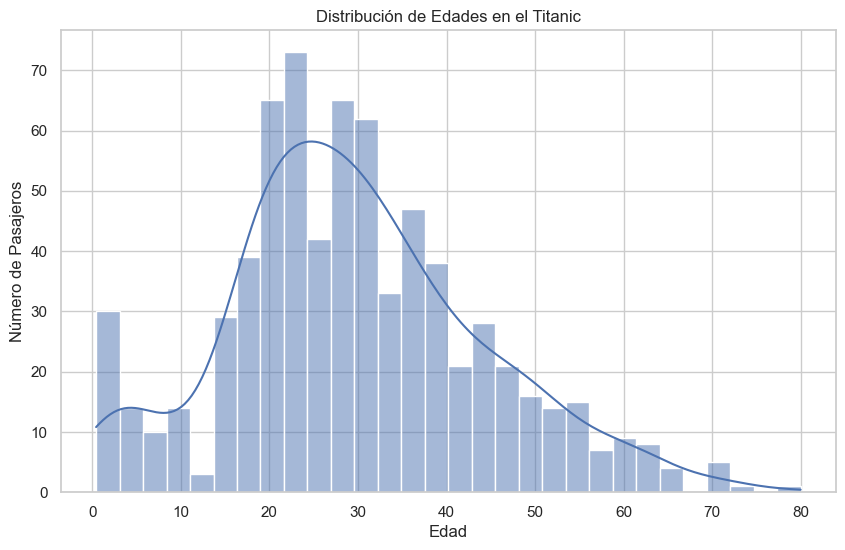

In [153]:
# Estilo de los gráficos
sns.set(style="whitegrid")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=True, bins=30)
plt.title('Distribución de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Número de Pasajeros')
plt.show()

### Mediana de la edad de los pasajeros

In [154]:
median_age = titanic_data['Age'].median()

print(f"La mediana de la edad es de {median_age:.2f}")

La mediana de la edad es de 28.00


### Precios más altos y más bajos

In [155]:
min_fare = titanic_data['Fare'].min()
max_fare = titanic_data['Fare'].max()

print(f"El precio mínimo es de {min_fare}")
print(f"El precio máximo es de {max_fare:.2f}")

El precio mínimo es de 0.0
El precio máximo es de 512.33


In [156]:
# Verificar el número de tarifas que son exactamente 0
num_fare_zero = titanic_data[titanic_data['Fare'] == 0].shape[0]

# Verificar el número de tarifas que son menores que 1 pero mayores que 0
num_fare_near_zero = titanic_data[(titanic_data['Fare'] > 0) & (titanic_data['Fare'] < 1)].shape[0]

# Verificar el número de tarifas que son menores que 10 pero mayores que 0
num_fare_near_zeroten = titanic_data[(titanic_data['Fare'] > 0) & (titanic_data['Fare'] < 15)].shape[0]

print(f"Número de tarifas exactamente 0: {num_fare_zero}")
print(f"Número de tarifas mayores que 0 y menores que 1: {num_fare_near_zero}")
print(f"Número de tarifas mayores que 0 y menores que 10: {num_fare_near_zeroten}")

Número de tarifas exactamente 0: 15
Número de tarifas mayores que 0 y menores que 1: 0
Número de tarifas mayores que 0 y menores que 10: 442


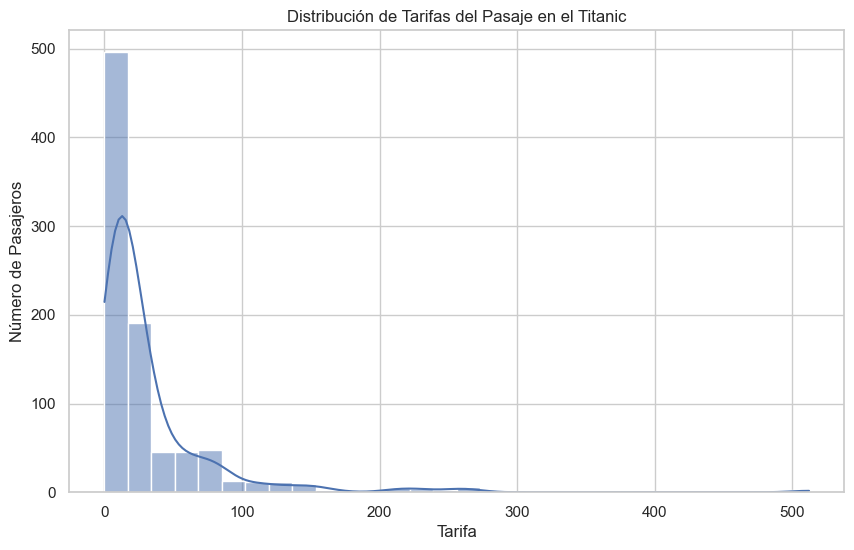

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Fare'], kde=True, bins=30)
plt.title('Distribución de Tarifas del Pasaje en el Titanic')
plt.xlabel('Tarifa')
plt.ylabel('Número de Pasajeros')
plt.show()


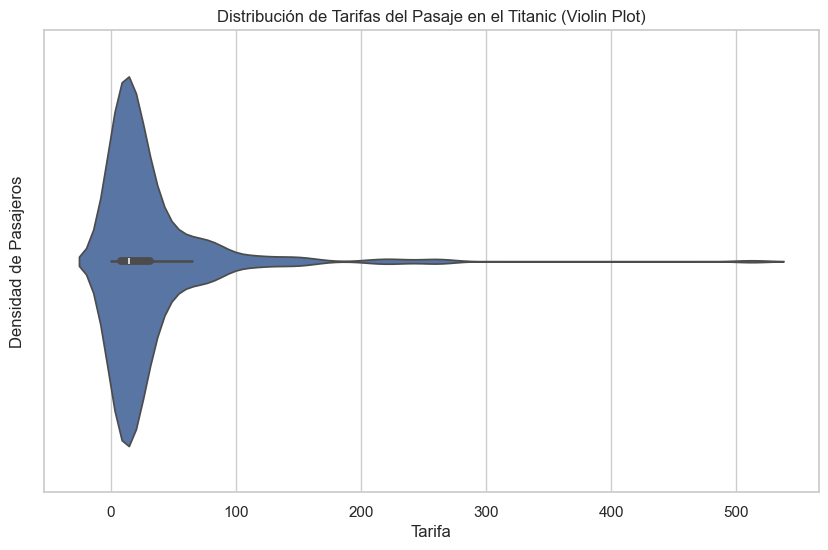

In [158]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=titanic_data['Fare'])
plt.title('Distribución de Tarifas del Pasaje en el Titanic (Violin Plot)')
plt.xlabel('Tarifa')
plt.ylabel('Densidad de Pasajeros')
plt.show()


### Número de pasajeros embarcados

In [159]:
embarked_count = titanic_data['Embarked'].value_counts()

embarked_count

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

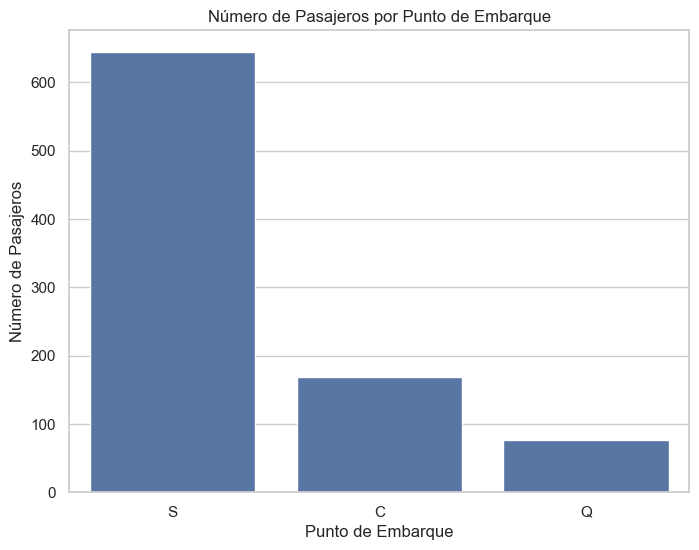

In [160]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=embarked_count.index, y=embarked_count.values)
plt.title('Número de Pasajeros por Punto de Embarque')
plt.xlabel('Punto de Embarque')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=0)  # Para rotar las etiquetas del eje x si es necesario
plt.show()

### Distribución de sexo en las personas embarcadas

In [161]:
gender_distribution = titanic_data['Sex'].value_counts()

gender_distribution

Sex
male      577
female    314
Name: count, dtype: int64

### Cálculo del porcentaje de mujeres y hombres que sobrevivieron sin contar niños

In [162]:
# Definir el umbral de edad para niños
age_threshold = 18

# Filtrar para excluir niños
adults = titanic_data[titanic_data['Age'] >= age_threshold]

# Calcular la cantidad de sobrevivientes adultos por sexo
survivors = adults[adults['Survived'] == 1]['Sex'].value_counts()

# Calcular el total de adultos por sexo
total_adults = adults['Sex'].value_counts()

# Calcular los porcentajes de supervivencia para mujeres y hombres adultos
survival_percentages = (survivors / total_adults) * 100

survival_percentages

Sex
female    77.184466
male      17.721519
Name: count, dtype: float64

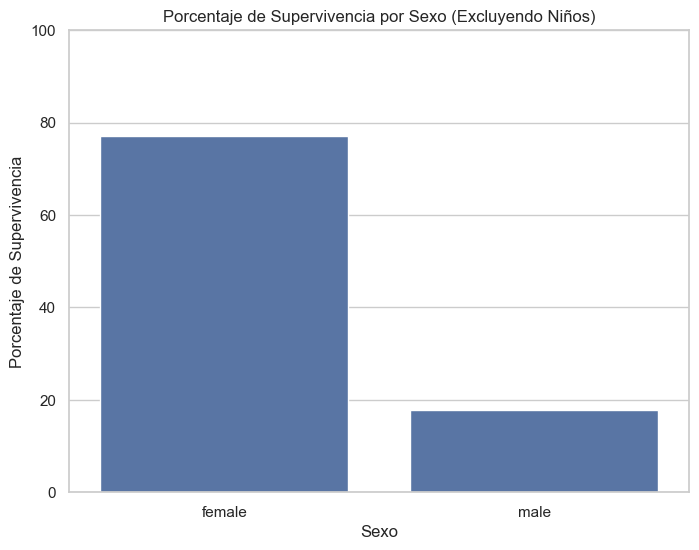

In [163]:
survivors_by_sex = adults.groupby('Sex')['Survived'].mean() * 100

# Crear el gráfico de barras para visualizar el porcentaje de supervivencia por sexo
plt.figure(figsize=(8, 6))
sns.barplot(x=survivors_by_sex.index, y=survivors_by_sex.values)
plt.title('Porcentaje de Supervivencia por Sexo (Excluyendo Niños)')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de Supervivencia')
plt.ylim(0, 100)
plt.show()

### Relación entre edad y supervivencia

Gráfico de densidad de kernel (KDE)

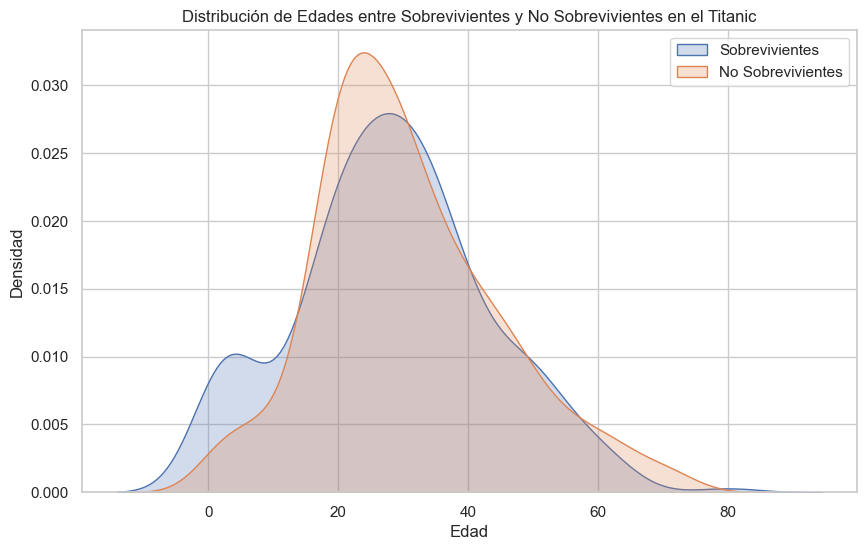

In [164]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic_data[titanic_data['Survived'] == 1]['Age'], label='Sobrevivientes', fill=True)
sns.kdeplot(titanic_data[titanic_data['Survived'] == 0]['Age'], label='No Sobrevivientes', fill=True)
plt.title('Distribución de Edades entre Sobrevivientes y No Sobrevivientes en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

### Relación entre clase de cabina y supervivencia

In [165]:
survival_by_class = titanic_data.groupby('Pclass')['Survived'].value_counts(normalize=True) * 100

survival_by_class

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64

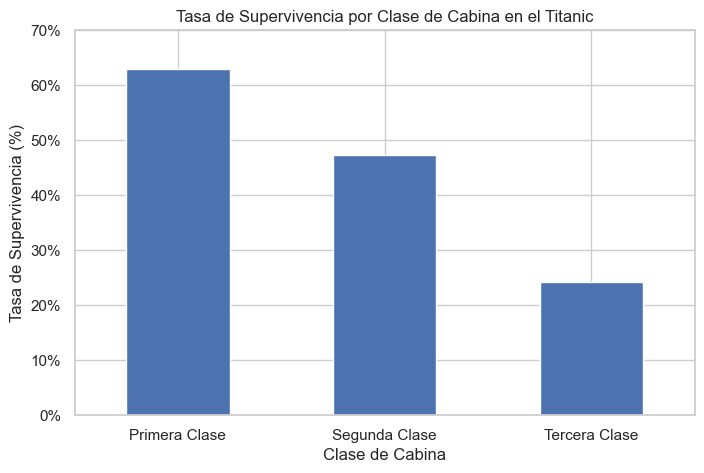

In [166]:
# Calcular la tasa de supervivencia por clase de cabina
survival_rates = titanic_data.groupby('Pclass')['Survived'].mean() *100

# Gráfico de barras
plt.figure(figsize=(8, 5))
survival_rates.plot(kind='bar')
plt.title('Tasa de Supervivencia por Clase de Cabina en el Titanic')
plt.xlabel('Clase de Cabina')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xticks([0, 1, 2], ['Primera Clase', 'Segunda Clase', 'Tercera Clase'], rotation=0)
plt.yticks(plt.yticks()[0], ['{:.0f}%'.format(y) for y in plt.yticks()[0]])
plt.show()


### Análisis general de la tasa de supervivencia desglosado por sexo y clase

In [167]:
# Análisis general de la tasa de supervivencia
overall_survival_rate = titanic_data['Survived'].mean() * 100

print(overall_survival_rate)

# Desglose de la tasa de supervivencia por sexo y clase
survival_by_sex_and_class = titanic_data.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

survival_by_sex_and_class


38.38383838383838


Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

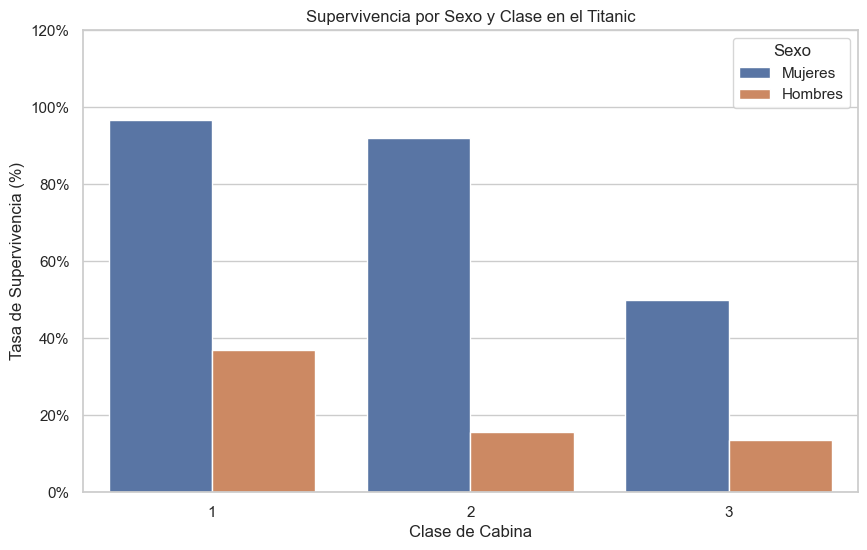

In [168]:
survival_rate = titanic_data.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

# Cambiamos los nombres 'female' por 'mujeres' y 'male' por 'hombres'
survival_rate['Sex'] = survival_rate['Sex'].map({'female': 'Mujeres', 'male': 'Hombres'})

# Convertir la tasa de supervivencia a porcentaje
survival_rate['Survived'] *= 100

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=survival_rate)
plt.title('Supervivencia por Sexo y Clase en el Titanic')
plt.xlabel('Clase de Cabina')
plt.ylabel('Tasa de Supervivencia (%)')
plt.legend(title='Sexo')
# Personalizamos etiquetas del eje y para que muestren %
plt.yticks(plt.yticks()[0], ['{:.0f}%'.format(y) for y in plt.yticks()[0]])
plt.show()

# Limpieza de datos

## ¿Qué vamos a tratar respecto a la limpieza de datos?
* Tratamiento de valores nulos con KNN
* Eliminar columnas irrelevantes
* Corregir tipos de datos como asegurarse de que la columna 'Fare' sea float y 'Age' sea entero
* Manejo de datos atípicos (Outliers)
* Verificar consistencia de los datos (verificar que los datos sean coherentes como por ejemplo que no haya edades negativas o tarifas negativas)

### Imputamos valores nulos con KNN de la columna 'Age'

In [169]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [170]:
# Creamos la columna lastname para guardar el apellido de los pasajeros
titanic_data['LastName'] = titanic_data['Name'].apply(lambda x: x.split(',')[0])

In [171]:
# Predictores del modelo
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age"] #la edad tiene que tenerse en cuenta al predecir, los apellidos es una variable muy random y ruidosa para introducirse

# Aplicamos OneHotEncoder para codificar nuestras variables categóricas 
encoder = OneHotEncoder(drop='first', sparse=False)
titanic_data_encoded = pd.DataFrame(encoder.fit_transform(titanic_data[columnas]))
titanic_data_encoded.columns = encoder.get_feature_names_out(columnas)

c:\Users\David\Desktop\upgrade_python\mi_entorno\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [172]:
# Creamos dos dataframes basados en la presencia de Age
titanic_data_encoded['Age'] = titanic_data['Age']
titanic_data_with_age = titanic_data_encoded.dropna(subset=['Age'])
titanic_data_without_age = titanic_data_encoded[titanic_data_encoded['Age'].isna()].drop(columns='Age')

In [173]:
# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(titanic_data_with_age.drop(columns='Age'), titanic_data_with_age['Age'], test_size=0.2, random_state=357)

scores = [219.08405565 122.88157895 223.62027544 135.65153772 167.68399386]
scores = [136.52994217  82.51329496 155.70730219 105.13201404 123.60082807]
scores = [130.4628458   60.18006121 135.48813665 108.51132836 116.9991268 ]
scores = [117.66245815  67.15095137 127.62349945 110.55036469 131.51371228]
scores = [125.76203809  68.63970772 127.35082789 125.38223218 134.64002067]
scores = [127.75953862  76.2862182  126.66201508 128.28372641 138.96856813]


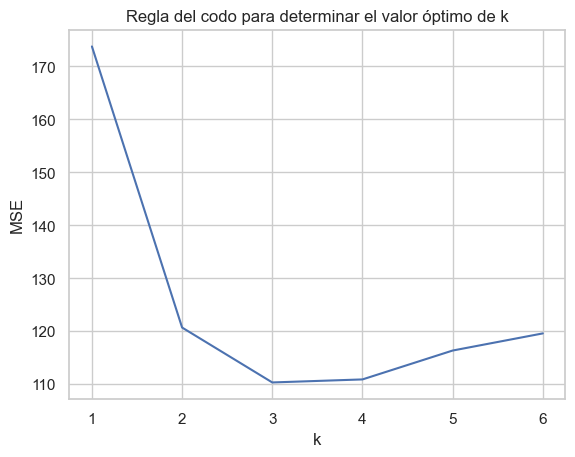

In [174]:
# Lista para almacenar los valores de MSE (Error Cuadrático Medio)
mse = []

# Rango de k para probar
k_range = range(1, 7)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Realizamos la validación cruzada para obtener una medida más robusta del error
    """  estamos tomando el negativo de los valores devueltos para obtener el MSE real. 
         Luego, añadimos la media de estos valores a nuestra lista de MSE para cada valor de k (mse.append(scores.mean())).
    """
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')
    
 
# Graficamos los valores 
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()


In [175]:
# Determinar el mejor valor de k
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

Mejor número K: 3


In [176]:
y_train = y_train.astype(int)

In [177]:
# Creamos el modelo KNN con el mejor valor de k
knn = KNeighborsRegressor(n_neighbors=best_k)

# Ajustamos el modelo a los datos sin valores nulos
knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
imputed_ages = knn.predict(titanic_data_without_age)
titanic_data.loc[titanic_data['Age'].isna(), 'Age'] = imputed_ages

### Imputamos columna 'Embarked' con el puerto más común

In [178]:
most_common_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(most_common_embarked, inplace=True)

### Eliminamos columna 'Ticket' y 'Cabin', dado que la segunda tiene muchos valores nulos y es más compleja de imputar, aparte no consideramos que sea esencial para nuestro análisis general

In [179]:
titanic_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

### Revisamos tipos de datos y realizamos conversiones

In [180]:
titanic_data['Fare'] = pd.to_numeric(titanic_data['Fare'], errors='coerce')
titanic_data['Age'] = pd.to_numeric(titanic_data['Age'], errors='coerce').astype(int)  

### Verificamos consistencia de los datos, asegurándose que no haya valores negativos en 'Age' y 'Fare'

In [181]:
assert (titanic_data['Age'] >=0).all(), "Negative values found in Age column"
assert (titanic_data['Fare'] >=0).all(), "Negative values found in Fare column"


### Retomamos los primeros registros del dataframe limpio y los tipos de datos

In [182]:
titanic_data_cleaned = titanic_data
titanic_data_cleaned.head(10), titanic_data_cleaned.describe()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 5            6         0       3   
 6            7         0       1   
 7            8         0       3   
 8            9         1       3   
 9           10         1       2   
 
                                                 Name     Sex  Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male   22      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
 2                             Heikkinen, Miss. Laina  female   26      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
 4                           Allen, Mr. William Henry    male   35      0   
 5                                   Moran, Mr. James    male   23      0   
 6                            McCarthy, Mr. Timothy 

## Una vez hemos limpiado y tratado los datos, vamos a proceder de nuevo con algunos de los análisis iniciales para comparar los resultados

### Verificamos que no haya valores nulos

In [183]:
null_values = titanic_data.isnull().sum()
print(null_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
LastName       0
dtype: int64


### Comprobamos de nuevo edades mínimas y máximas (observamos como ha cambiado la edad mínima tras tratar la columna 'Age')

In [184]:
min_age = titanic_data['Age'].min()
max_age = titanic_data['Age'].max()

print(f"La edad mínima es de {min_age}")
print(f"La edad máxima es de {max_age}")

La edad mínima es de 0
La edad máxima es de 80


### Visualización de la distribución de las edades de los pasajeros del Titanic

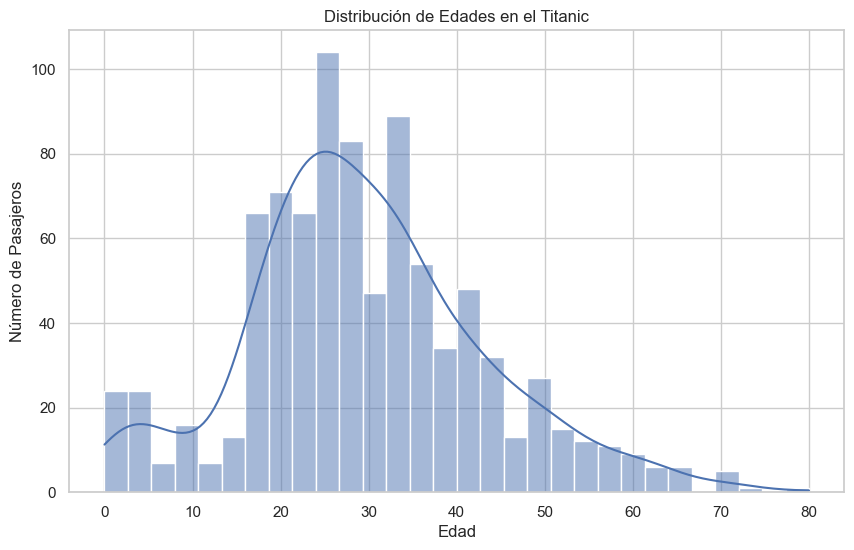

In [185]:
# Estilo de los gráficos
sns.set(style="whitegrid")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=True, bins=30)
plt.title('Distribución de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Número de Pasajeros')
plt.show()

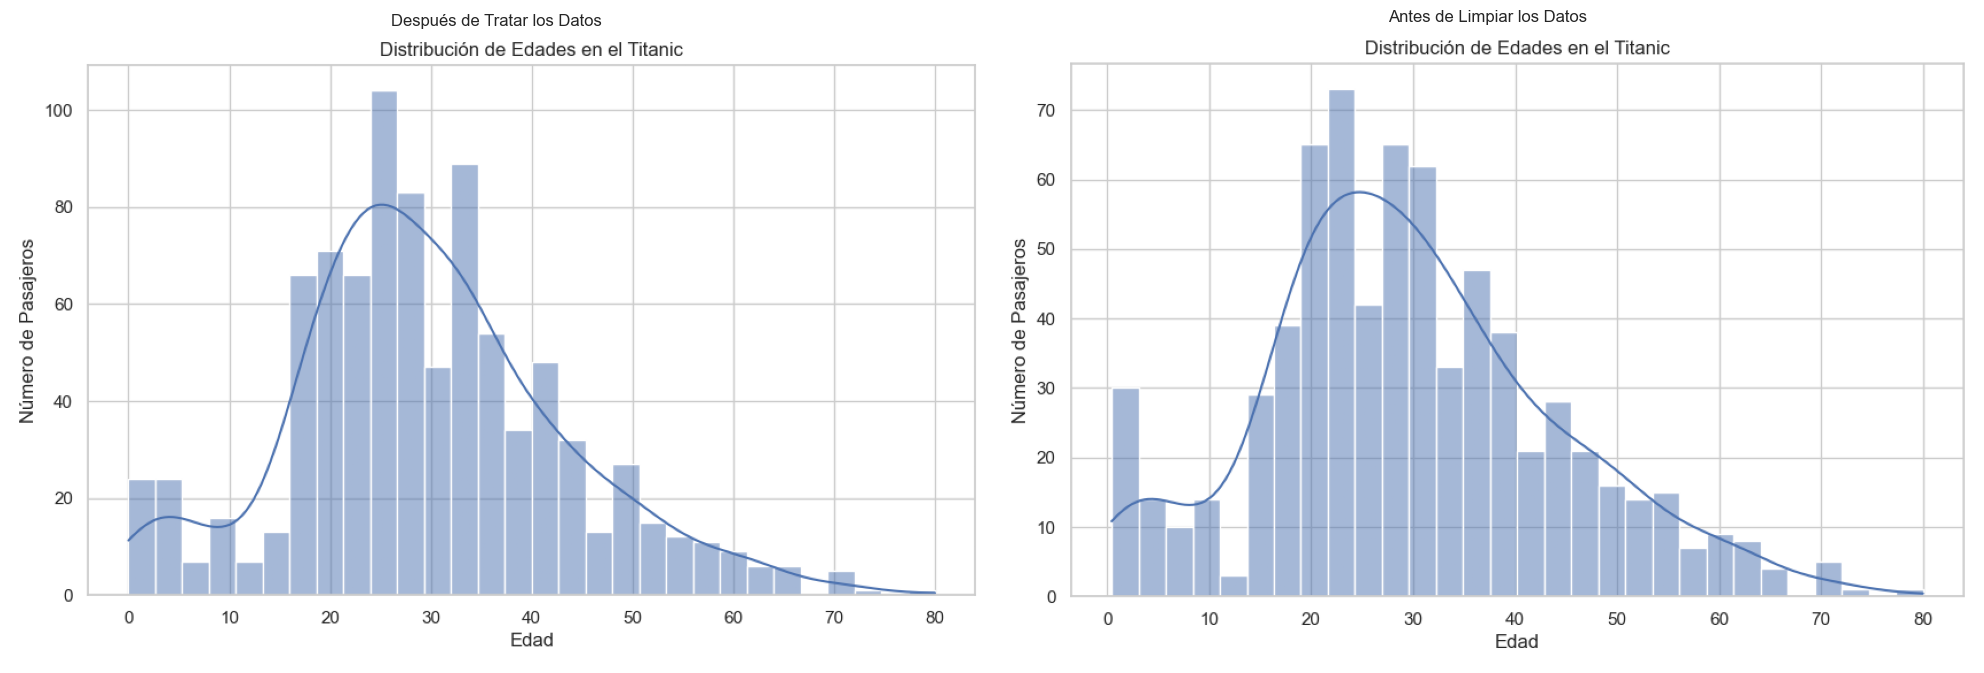

In [186]:
# Creamos un DataFrame de ejemplo con datos aleatorios para simular los datos del usuario.
np.random.seed(0)
titanic_data_example = pd.DataFrame({
    'Age': np.random.uniform(0, 80, 1000),
    'Survived': np.random.randint(0, 2, 1000)
})

# Ahora simularemos la limpieza de datos. Para el ejemplo, simplemente vamos a asegurarnos de que
# los datos estén dentro de un rango razonable y no haya valores negativos o extremadamente grandes.
titanic_data_cleaned = titanic_data_example[(titanic_data_example['Age'] >= 0) & 
                                            (titanic_data_example['Age'] <= 80)]

# Cargaremos ambas imágenes y las mostramos usando subplots.
# Definimos la ruta a las imágenes que vamos a mostrar.
img_path_cleaned = 'C:/Users/David/Desktop/upgrade_python/temario_bootcamp/Modulo1/Proyecto-Módulo1/Ejercicio3-Titanic/output2.png'  # Esta sería la primera imagen (después de tratar los datos)
img_path_uncleaned = 'C:/Users/David/Desktop/upgrade_python/temario_bootcamp/Modulo1/Proyecto-Módulo1/Ejercicio3-Titanic/output.png'  # Esta sería la segunda imagen (antes de limpiar los datos)

# Cargamos las imágenes.
img_cleaned = mpimg.imread(img_path_cleaned)
img_uncleaned = mpimg.imread(img_path_uncleaned)

# Creamos la figura y los ejes para los subplots.
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Mostramos cada imagen en su respectivo eje.
axs[0].imshow(img_cleaned)
axs[0].axis('off')  # Ocultamos los ejes para la primera imagen
axs[0].set_title('Después de Tratar los Datos')

axs[1].imshow(img_uncleaned)
axs[1].axis('off')  # Ocultamos los ejes para la segunda imagen
axs[1].set_title('Antes de Limpiar los Datos')

plt.tight_layout()

plt.show()

### Relación entre edad y supervivencia

Diagrama de dispersión

Gráfico de densidad de kernel (KDE)

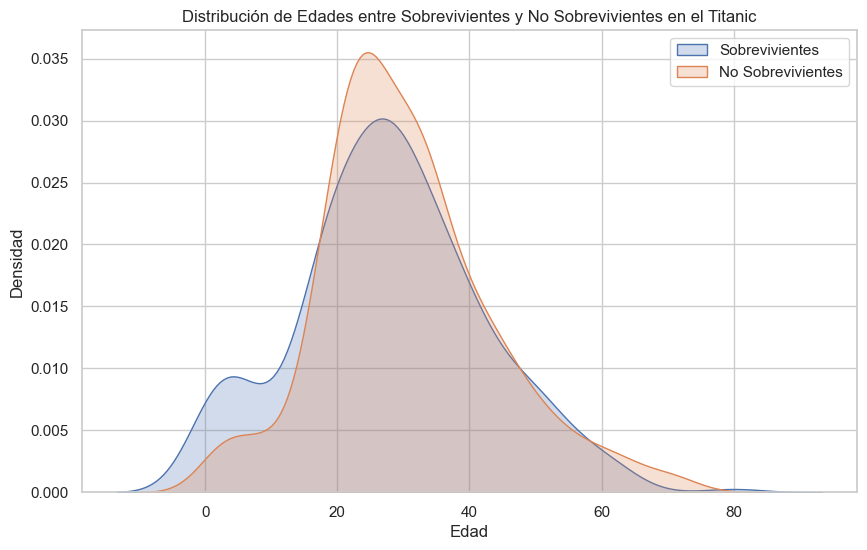

In [187]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic_data[titanic_data['Survived'] == 1]['Age'], label='Sobrevivientes', fill=True)
sns.kdeplot(titanic_data[titanic_data['Survived'] == 0]['Age'], label='No Sobrevivientes', fill=True)
plt.title('Distribución de Edades entre Sobrevivientes y No Sobrevivientes en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

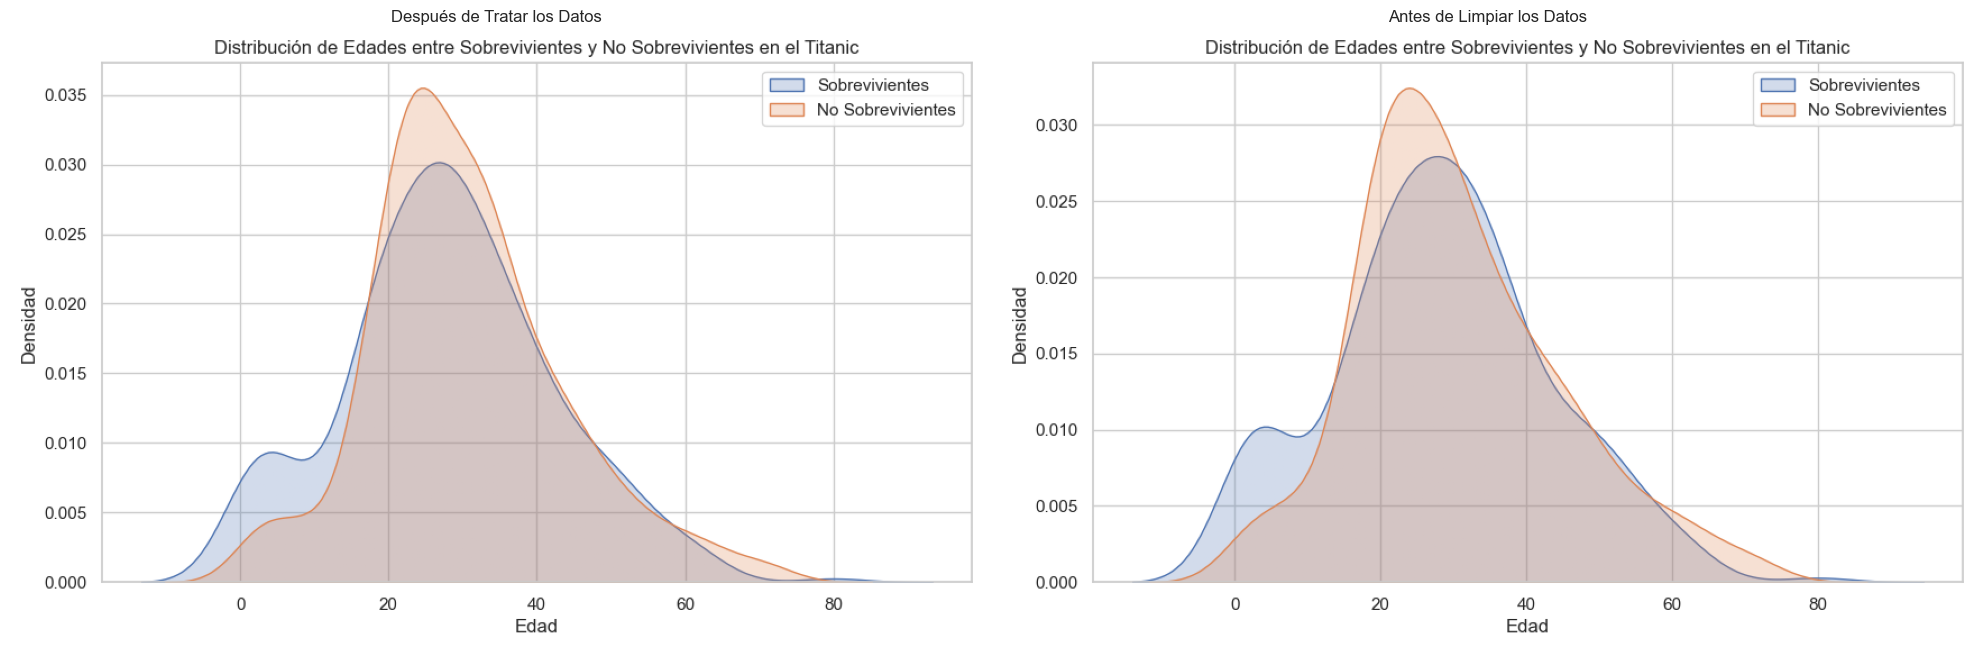

In [188]:
# Creamos un DataFrame de ejemplo con datos aleatorios para simular los datos del usuario.
np.random.seed(0)
titanic_data_example = pd.DataFrame({
    'Age': np.random.uniform(0, 80, 1000),
    'Survived': np.random.randint(0, 2, 1000)
})

# Ahora simularemos la limpieza de datos. Para el ejemplo, simplemente vamos a asegurarnos de que
# los datos estén dentro de un rango razonable y no haya valores negativos o extremadamente grandes.
titanic_data_cleaned = titanic_data_example[(titanic_data_example['Age'] >= 0) & 
                                            (titanic_data_example['Age'] <= 80)]

# Cargaremos ambas imágenes y las mostramos usando subplots.
# Definimos la ruta a las imágenes que vamos a mostrar.
img_path_cleaned = 'C:/Users/David/Desktop/upgrade_python/temario_bootcamp/Modulo1/Proyecto-Módulo1/Ejercicio3-Titanic/output4.png'  # Esta sería la primera imagen (después de tratar los datos)
img_path_uncleaned = 'C:/Users/David/Desktop/upgrade_python/temario_bootcamp/Modulo1/Proyecto-Módulo1/Ejercicio3-Titanic/output3.png'  # Esta sería la segunda imagen (antes de limpiar los datos)

# Cargamos las imágenes.
img_cleaned = mpimg.imread(img_path_cleaned)
img_uncleaned = mpimg.imread(img_path_uncleaned)

# Creamos la figura y los ejes para los subplots.
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Mostramos cada imagen en su respectivo eje.
axs[0].imshow(img_cleaned)
axs[0].axis('off')  # Ocultamos los ejes para la primera imagen
axs[0].set_title('Después de Tratar los Datos')

axs[1].imshow(img_uncleaned)
axs[1].axis('off')  # Ocultamos los ejes para la segunda imagen
axs[1].set_title('Antes de Limpiar los Datos')

plt.tight_layout()

plt.show()
